In [94]:
import cv2
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import glob

A 4
B 4
C 4
D 4
E 4
F 4
G 4
H 4
I 4
J 4
K 4
L 4
M 4
N 4
O 4
P 4
Q 0
R 4
S 4
T 4
U 4
V 4
W 4
X 4
Y 4
Z 4
trash 4


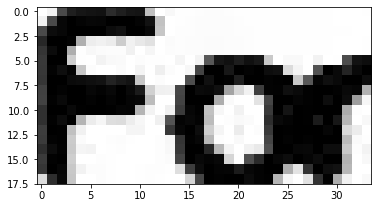

In [113]:
path = "/home/konstantin/git/term_papers/dataset_without_jp2_with_contours/13-5563001_990T_201106"
current_image = 0
number_bound_box = 0
crop_img = 0
token = 26
with open(path + "/layout.xml") as f:
    for line in f:
        if ("WORD" in line and current_image== 2):
            coordinate = line.split("=")[1].split(">")[0].replace("\"", "").split(",")
            x1 = int(coordinate[0])
            y1 = int(coordinate[1])
            x2 = int(coordinate[2])
            y2 = int(coordinate[3])
            if (number_bound_box == token):
                crop_img = image[y2:y1, x1:x2]
                plt.imshow(crop_img)
                break
            else:
                number_bound_box += 1
                
            #cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

        if "<OBJECT data" in line:
            if current_image == 1:
                current_image += 1
                image = cv2.imread(path + "/00" + str(current_image) + ".jpg")
            else:
                current_image+=1
            if current_image > 2:
                break
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("/home/konstantin/git/term_papers/mmcs_sfedu_thesis-master/img/cropped_bad.jpg", gray)
for dir_ in sorted(glob.glob('./markup/test/*')):
    l = dir_[len(dir_) - dir_[::-1].find('/'):]
    print(l, len(glob.glob(dir_ + '/*')))

True

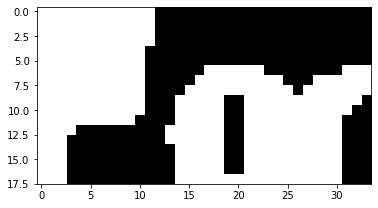

In [114]:
kernel_length = np.array(gray).shape[1] // 4

verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

img_temp1 = cv2.erode(gray, verticle_kernel, iterations=1)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=1)

img_temp2 = cv2.erode(gray, hori_kernel, iterations=1)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=1)

alpha = 0.9
beta = 1.0 - alpha

img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_final_bin, cmap = "gray")
cv2.imwrite("/home/konstantin/git/term_papers/mmcs_sfedu_thesis-master/img/morhological_bad.jpg", gray)

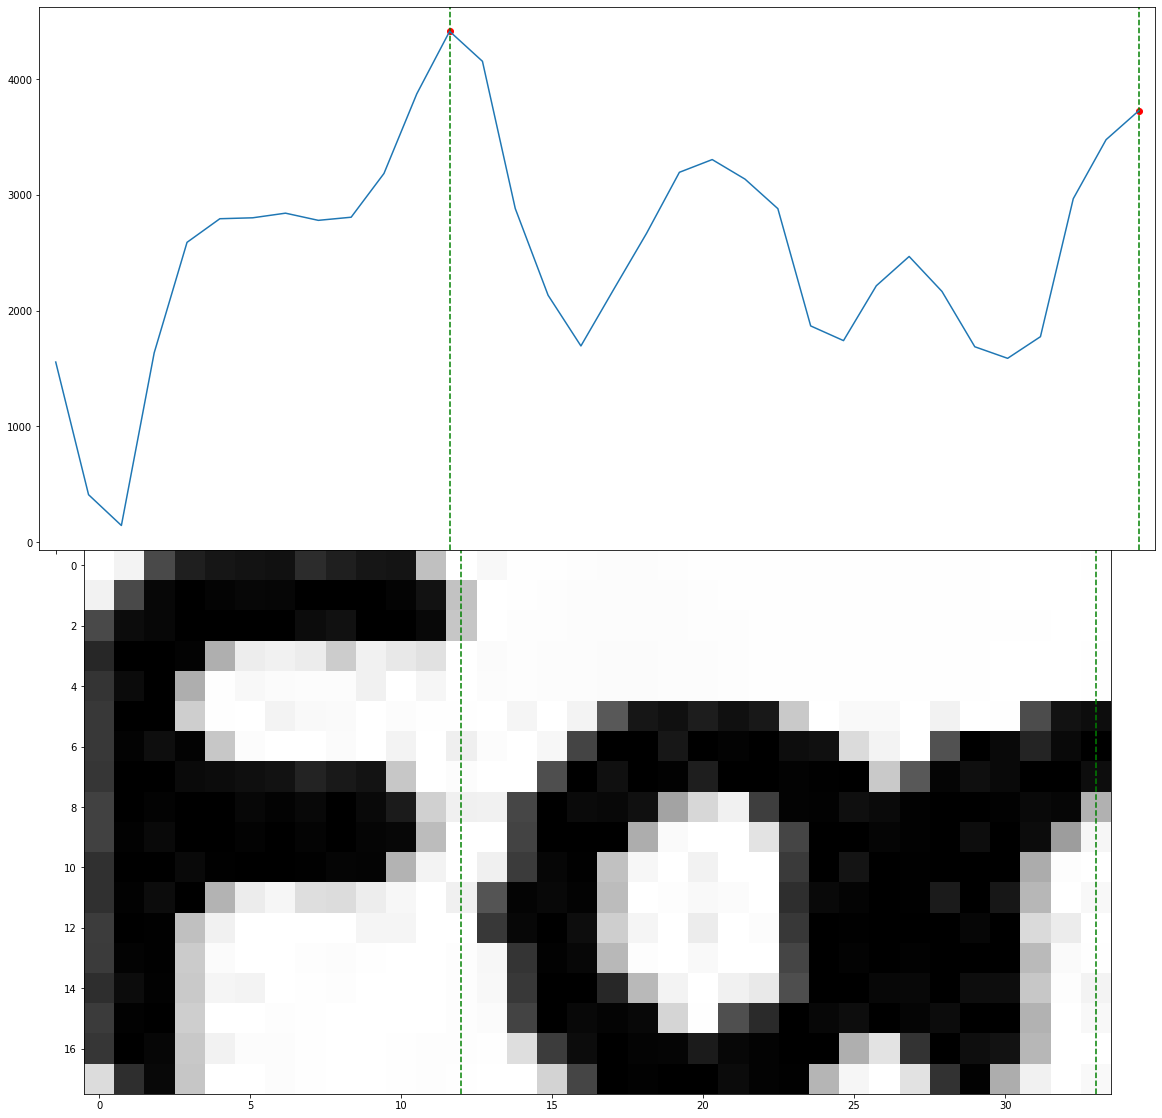

In [115]:
hist = np.sum(gray, axis=0)
#fig, (ax1, ax2) = plt.subplot(1, 2)
# fig,ax1 = plt.subplots(2)
diff = (90*np.amax(hist))/100.0

fig, (ax1, ax2) = plt.subplots(nrows=2,  sharex=True, figsize=(20,20))

neighbor=hist[0]
list_nimimus = []
for index in range(len(hist) - 5):
    current_list = hist[index: index+5]
    if (current_list[2] == np.max(current_list) and current_list[2] > diff):
        list_nimimus.append(index+2)

list_nimimus.append(len(hist)-1)
for item in list_nimimus:
    ax1.axvline(item,color='green',ls='--')
    ax2.axvline(item,color='green',ls='--')
    ax1.scatter(item, hist[item], color = 'red')      
ax1.plot(hist)

ax2.imshow(gray, cmap = "gray")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("/home/konstantin/git/term_papers/mmcs_sfedu_thesis-master/img/hist_bad.png")

prev = 0
list_croped_image = []
for item in list_nimimus:
    croped_image = gray[:, prev:item]
    prev = item
    list_croped_image.append(croped_image)

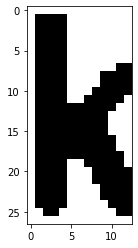

In [80]:
thumb = list_croped_image[3]
(thresh, img_bin) = cv2.threshold(thumb, 4, 255,
                                  cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(img_bin, "gray")

In [620]:
letter = 'trash'
export_dir = './markup/test/' + letter
counter = len(glob.glob(export_dir + '/*'))
fname = f"{counter:02}"
fname = export_dir + '/' + fname + '.png'
plt.imsave(fname, thumb, cmap='gray')

In [581]:
path = "/home/konstantin/git/term_papers/dataset_without_jp2_with_contours/13-5563001_990T_201106"
current_image = 0
number_bound_box = 0
crop_img = 0
token = 0
with open(path + "/layout.xml") as f:
    for line in f:
        if ("WORD" in line and ("Z" in line or "z" in line) and current_image== 2):
            print(token)
            print(line)
            token+=1
        elif ("WORD" in line and current_image== 2):
            token+=1
        if "<OBJECT data" in line:
            if current_image == 1:
                current_image += 1
            else:
                current_image+=1
            if current_image > 2:
                break

15
<WORD coords="833,250,1180,196,239">Organization</WORD>

55
<WORD coords="2161,335,2310,312,330">Organizations</WORD>

86
<WORD coords="768,383,924,355,377">organization</WORD>

144
<WORD coords="955,622,998,596,622">ZIP</WORD>

169
<WORD coords="650,773,805,744,767">organization</WORD>

189
<WORD coords="379,869,560,838,863">organization&apos;s</WORD>

246
<WORD coords="739,1011,1090,979,1009">ORGANIZATION</WORD>

380
<WORD coords="956,1599,1128,1570,1593">organizations</WORD>

393
<WORD coords="953,1648,1109,1619,1641">organization</WORD>

624
<WORD coords="287,3042,341,3021,3041">zero</WORD>

